# Importing the librairies

In [1]:
#Importing the librairies


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Creating DataFrame

In [2]:
#Creating DataFrame

df = pd.DataFrame(load_diabetes().data)

# EDA (Exploratory Data Analysis)

In [ ]:
#EDA (Exploratory Data Analysis)

df.columns = load_diabetes().feature_names

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
load_diabetes().target


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
#Add columns data frame as 'GTT'

df['GTT'] = load_diabetes().target

df.head()

,0,1,2,3,4,5,6,7,8,9,GTT
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
df.shape # To get numbers of columns and rows

(442, 11)

In [7]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,GTT
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,GTT
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [9]:
df.max()

0        0.110727
1        0.050680
2        0.170555
3        0.132044
4        0.153914
5        0.198788
6        0.181179
7        0.185234
8        0.133597
9        0.135612
GTT    346.000000
dtype: float64

In [10]:
df.min()

0      -0.107226
1      -0.044642
2      -0.090275
3      -0.112399
4      -0.126781
5      -0.115613
6      -0.102307
7      -0.076395
8      -0.126097
9      -0.137767
GTT    25.000000
dtype: float64

In [11]:
# Count numbers of unique value

df.nunique()

0       58
1        2
2      163
3      100
4      141
5      302
6       63
7       66
8      184
9       56
GTT    214
dtype: int64

In [12]:
# Check number of null value

df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
GTT    0
dtype: int64

In [13]:
df.corr

<bound method DataFrame.corr of             0         1         2         3         4         5         6  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

            7         8         9    GTT  
0   -0.002592  0.019907 -0.017646  151.0  
1   -0.039493 -0.068332 -0.092204   75.0  
2   -0.002592  0.002861 -0.025930  141.0  
3    0.034309  0.022688 -0.009362  206.0  
4   -0.002592 -0.031988 -0.046641  135.0  
..        ...       ...       ...    ...  
437 -0.002592  0.031193  0.007207  178.0  
438  0.034309 -0.018114  0.044485  104.0  
439 -0.011080 -0.046883  0.015491  132.0  
440  0.026560  0.044529 -0.025930  220.0  
441 -0.039493 -0.004222  0.003064   57.0  

[442 rows x 11 columns]>

<Axes: >

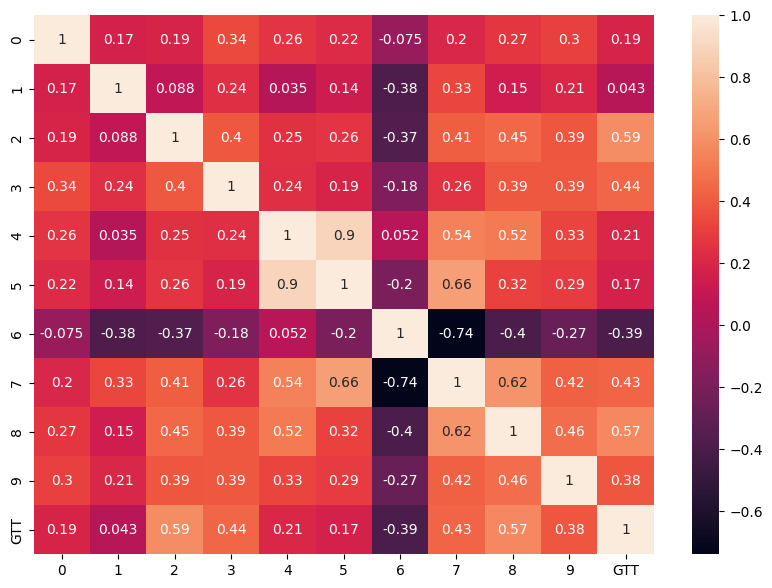

In [14]:
# plot to see the corr

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

# Explore the data

In [15]:
# Explore the data

df.to_csv('load_diabetes.csv')

# Machine learning

In [16]:
# Machine learning

df.head()

,0,1,2,3,4,5,6,7,8,9,GTT
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
X = np.array(df.drop('GTT', axis=1))
y = np.array(df.GTT)

In [18]:
# Spliting the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [19]:
# Choose and Fitting the model

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict

y_pred = model.predict(X_test)

In [21]:
# Score

model.score(X_test,y_pred)
r2_score(y_test,y_pred)


0.4526027629719195

In [22]:
mean_absolute_error(y_test,y_pred)

42.79409467959994

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

53.85344583676593